# 用户指南，第17章：派生
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_17_derivations.html)

假设你有一个 music21 乐谱，其组织结构如下：
![图 17.1：乐谱层次结构](graphicalRepresentation/music21_hierarchy.jpg)

我们已经知道，通过`for n in score: print n`遍历乐谱只会得到最顶层的对象，即`Metadata`对象和两个`Part`对象。而看不到内部的乐谱元素（如小节、谱号、音符等）。如需获取所有对象，最简单的方法就是使用`Stream.flatten()`。在乐谱上调用该方法将展开所有的流，使得只有非流元素（下图中的粉色方块）保留在乐谱中：

![图 17.1：扁平化乐谱](graphicalRepresentation/music21_flat.jpg)

本章将解释最开始的`stream.Score`对象（下称`s`）与扁平化表示形式（下称`s.flat`或`sf`）之间的关系。这两个对象之间的关系称为派生`Derivation`。下图表示了它们之间的关系：

![图 17.3：派生](graphicalRepresentation/music21_derivation.jpg)

下面以莫扎特的一部弦乐四重奏，K. 80，为例，解释 music21 中的派生。

In [1]:
from music21 import *
s = corpus.parse('mozart/k80', 1)
s.id = 'mozartK80'
s.derivation

<Derivation of <music21.stream.Score mozartK80> from None>

这个`Score`是 music21 中表示该作品的第一个 Stream，因此它没有派生来源。接下来，我们用`.measures`查看作品的头几小节。

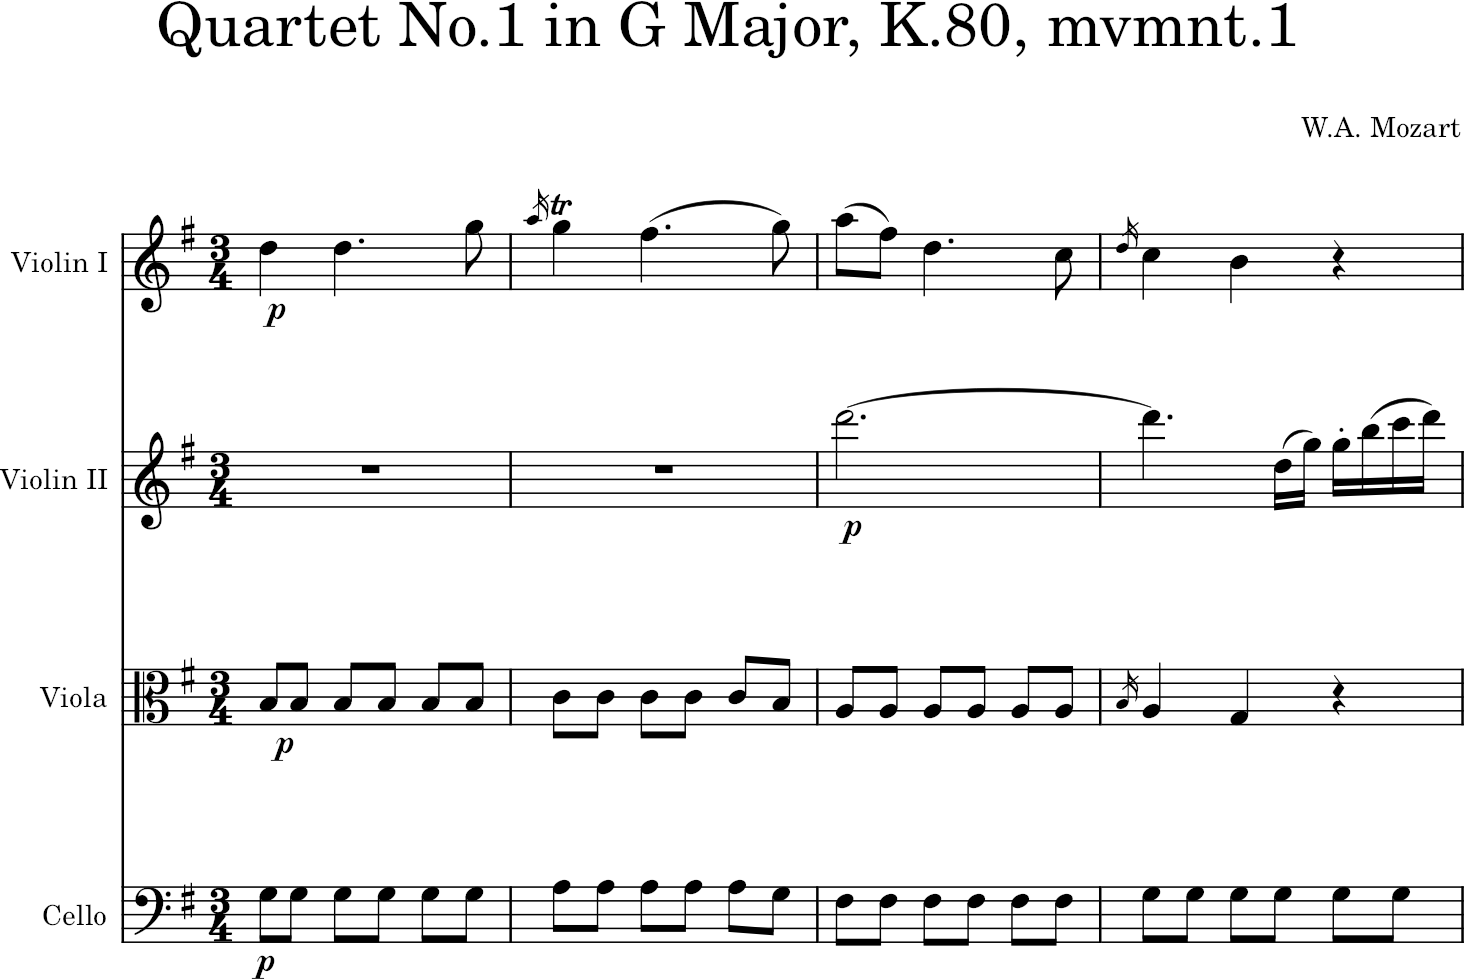

In [2]:
sExcerpt = s.measures(1, 4)
sExcerpt.id = 'excerpt'
sExcerpt.show()

这段摘录包含了有意义的`.derivation`

In [3]:
sExcerpt.derivation

<Derivation of <music21.stream.Score excerpt> from <music21.stream.Score mozartK80> via 'measures'>

`derivation`对象的显示包含3项信息：现状（即容纳`Derivation`对象的元素）、来源（“现状”从中产生），以及从“来源”到“现状”的方法：

In [4]:
sExcerpt.derivation.client

<music21.stream.Score excerpt>

In [5]:
sExcerpt.derivation.origin

<music21.stream.Score mozartK80>

In [6]:
sExcerpt.derivation.method

'measures'

让我们从已有的摘录中创建另一个`Stream`，这次通过转调：

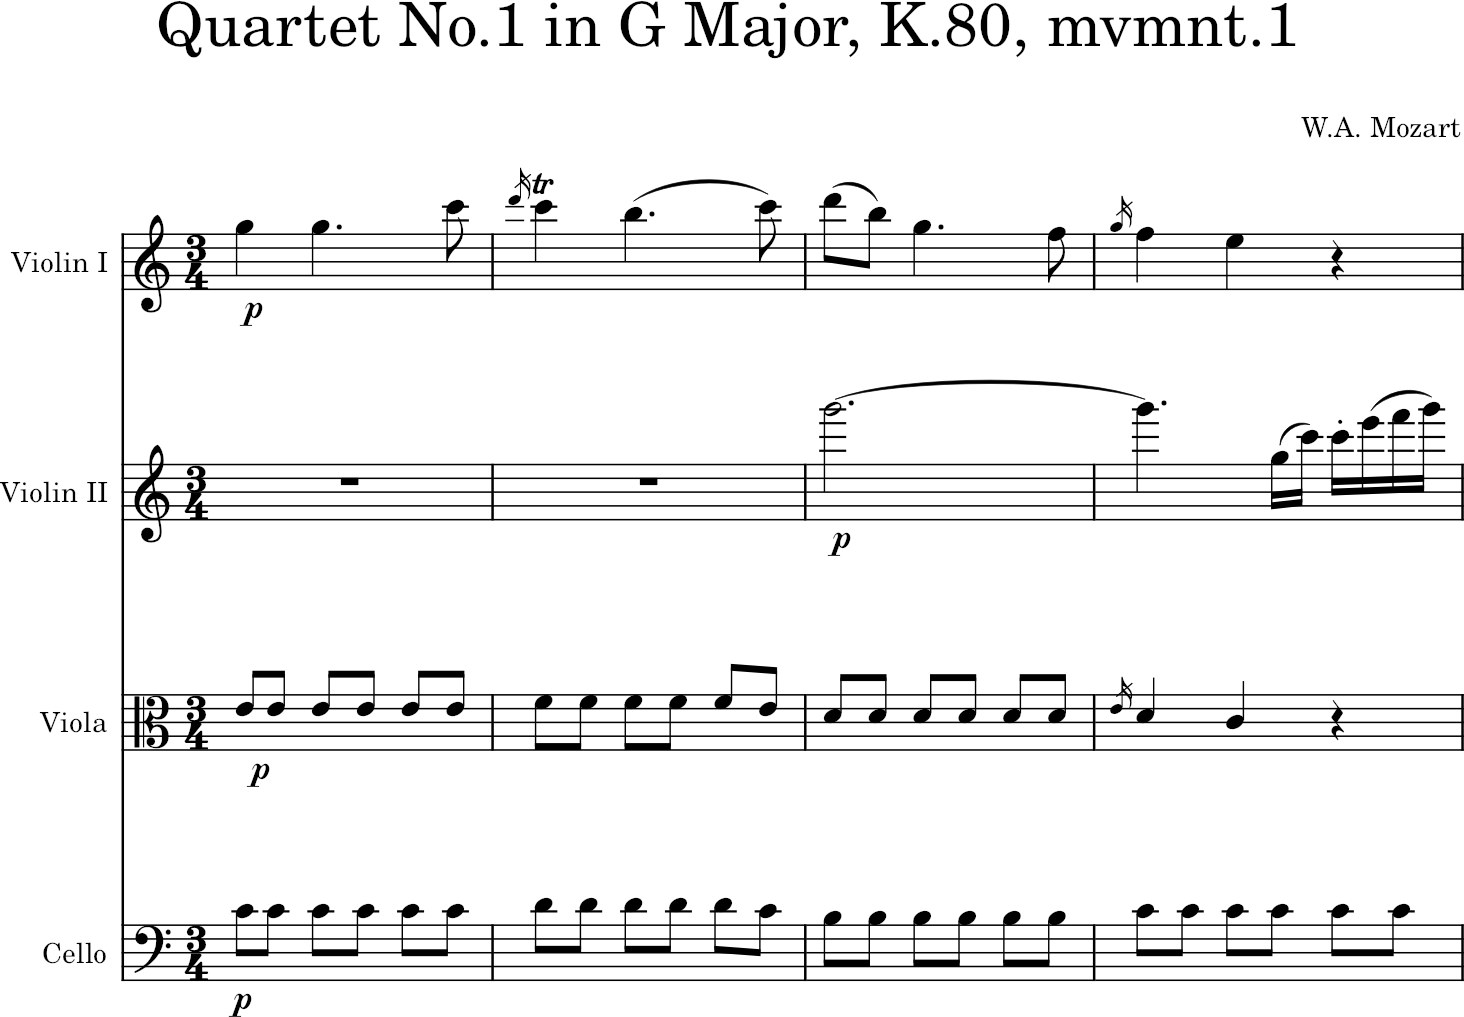

In [7]:
sTransposed = sExcerpt.transpose('P4')
sTransposed.show()

In [8]:
sTransposed.id = 'transposed'
sTransposed.derivation

<Derivation of <music21.stream.Score transposed> from <music21.stream.Score excerpt> via 'transpose'>

In [9]:
sTransposed.derivation.method

'transpose'

现在这个`Stream`有一个来源，那个`Stream`也有一个来源。如果我们想知道一切从何而来，我们可以使用 .rootDerivation 属性：

In [10]:
sTransposed.derivation.origin

<music21.stream.Score excerpt>

In [11]:
sTransposed.derivation.origin.derivation.origin

<music21.stream.Score mozartK80>

In [12]:
sTransposed.derivation.rootDerivation

<music21.stream.Score mozartK80>

如果我们想了解这个`Stream`的完整历史，我们可以使用`Derivation`对象上的`.chain()`方法：

In [13]:
for previousScore in sTransposed.derivation.chain():
    print(previousScore)

<music21.stream.Score excerpt>
<music21.stream.Score mozartK80>


注意，派生保留了它们来源的信息，但反之则不然：无法从原始的“mozartK80”流回到移调过后的流。

派生链有很多用途。例如，如果我们想将每个`piano`标记更改为`forte`，我们可以在`Stream`上定义一个函数来执行这个操作，然后调用它对`sTransposed`进行操作：

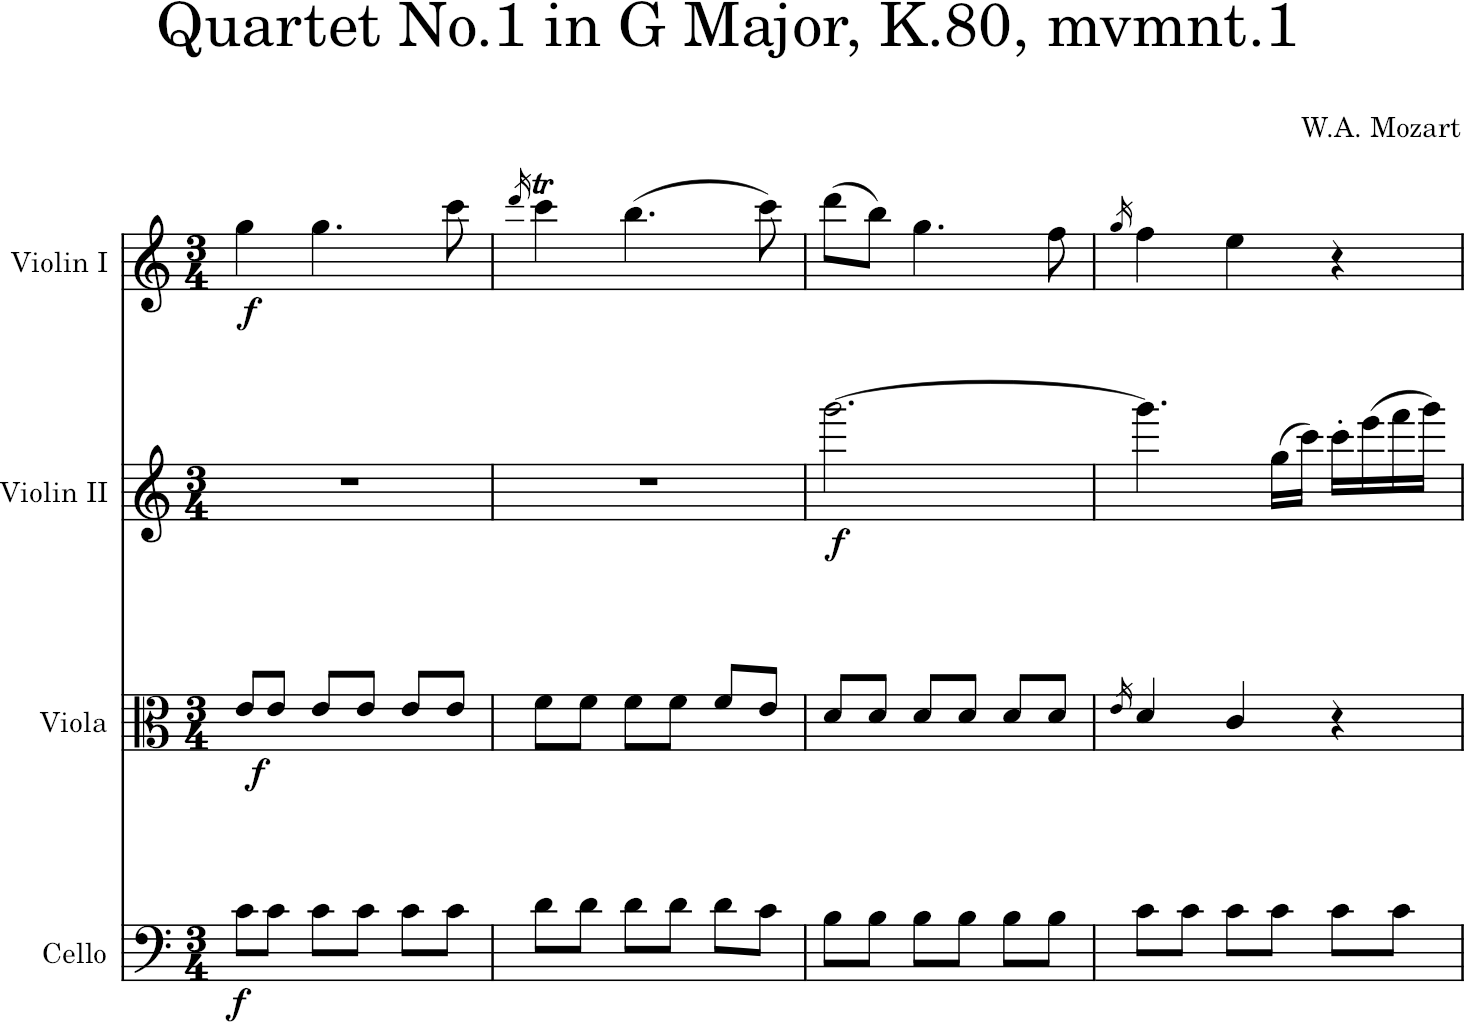

In [14]:
def makeLouder(s):
    for dyn in s.recurse().getElementsByClass('Dynamic'):
        dyn.value = 'f'

makeLouder(sTransposed)
sTransposed.show()

这很酷，但我们的原始乐谱没有改变：

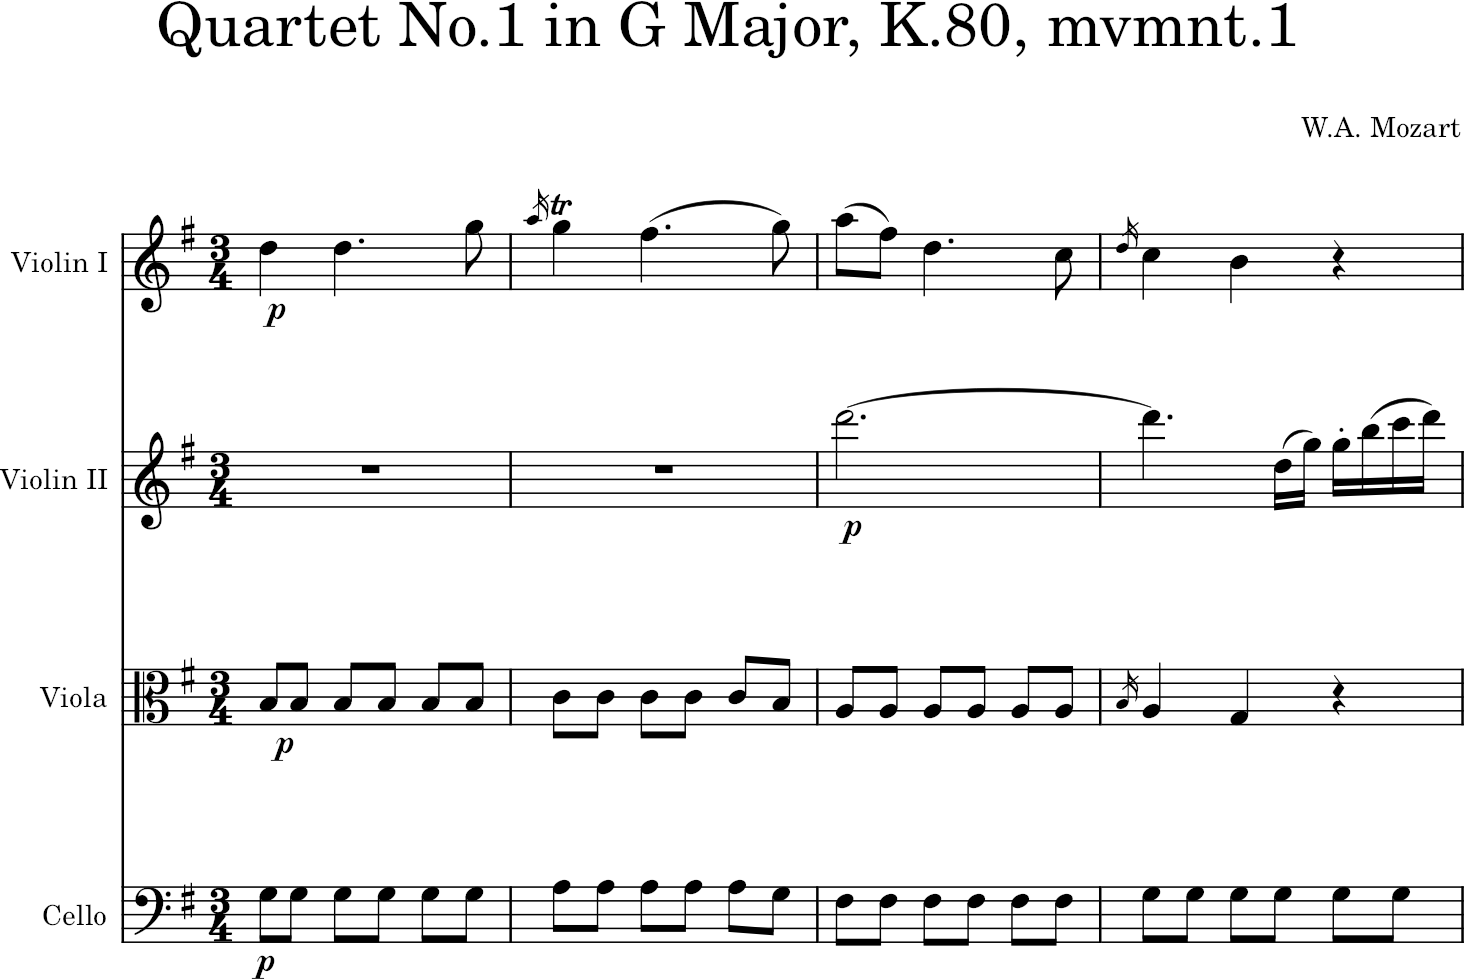

In [15]:
sExcerpt.show()

因此，如果我们想回溯乐谱的历史，就在每个`Score`中调用`.derivation.chain()`中的`makeLouder`（现在你可能明白为什么一开始就把`makeLouder`做成一个函数了：）

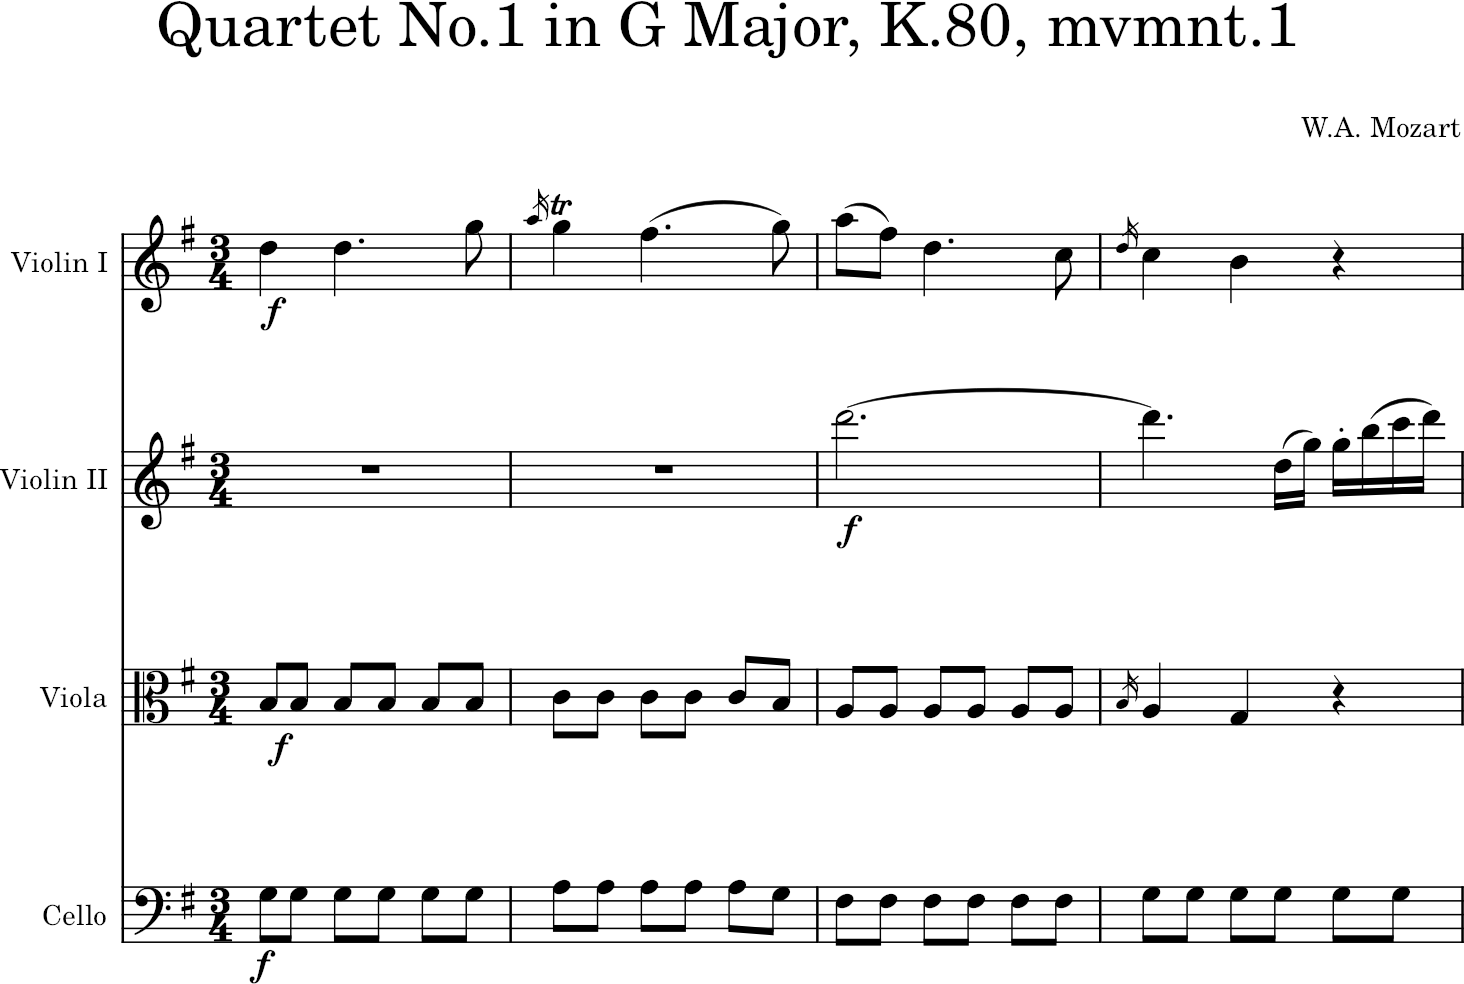

In [16]:
for s in sTransposed.derivation.chain():
    makeLouder(s)

sExcerpt.show()

我希望这不仅能让你了解什么是派生，还能让你明白为什么可能会用到它们。在后面的章节中，我们会继续使用派生，但现在让我们回到音乐理论的基础，在[第18章](18.ipynb)中探讨音程。